In [ ]:
# Import Packages
import numpy as np
import pandas as pd
import os
if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Import Files
from google.colab import files
uploaded = files.upload()

Saving peta bencana.csv to peta bencana.csv


In [ ]:
## Import Files
from google.colab import files
uploaded = files.upload()

Saving data-rekapitulasi-kejadian-banjir-tahun-2020.csv to data-rekapitulasi-kejadian-banjir-tahun-2020.csv


# Data Preprocessing

**File Peta Bencana**

In [ ]:
df = pd.read_csv("/content/peta bencana.csv")
df.head()

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,1/1/2020,0:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,95061,1/1/2020,0:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,95062,1/1/2020,1:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,95063,1/1/2020,1:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,95064,1/1/2020,1:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pkey           4235 non-null   int64  
 1   date           4235 non-null   object 
 2   time           4235 non-null   object 
 3   source         4235 non-null   object 
 4   status         4235 non-null   object 
 5   url            3570 non-null   object 
 6   image_url      3334 non-null   object 
 7   disaster_type  4235 non-null   object 
 8   report_dat     3455 non-null   object 
 9   tags           4235 non-null   object 
 10  title          188 non-null    object 
 11  text           3830 non-null   object 
 12  ID_Desa        4227 non-null   float64
 13  ID_Kec         4227 non-null   float64
 14  ID_Kab         4227 non-null   float64
 15  ID_Prov        4227 non-null   float64
 16  Desa           4227 non-null   object 
 17  Kecamatan      4227 non-null   object 
 18  Kabupate

In [ ]:
df.shape

(4235, 22)

In [ ]:
df.describe()

,pkey,ID_Desa,ID_Kec,ID_Kab,ID_Prov,long,lat
count,4235.000000,4.227000e+03,4.227000e+03,4227.000000,4227.000000,4235.000000,4235.000000
mean,183639.100590,3.561485e+09,3.561485e+06,3561.424651,35.025787,108.271799,-5.810972
std,74804.128634,1.090398e+09,1.090398e+06,1090.399979,11.009528,4.222665,2.137486
min,94941.000000,1.103030e+09,1.103030e+06,1103.000000,11.000000,2.351460,-10.205170
25%,108712.500000,3.172090e+09,3.172090e+06,3172.000000,31.000000,106.810090,-6.280165
50%,190452.000000,3.175020e+09,3.175020e+06,3175.000000,31.000000,106.884960,-6.207370
75%,257896.500000,3.307570e+09,3.307570e+06,3307.500000,33.000000,107.164205,-6.158490
max,299728.000000,9.420020e+09,9.420020e+06,9420.000000,94.000000,140.664020,48.856696


In [ ]:
df.dtypes

pkey               int64
date              object
time              object
source            object
status            object
url               object
image_url         object
disaster_type     object
report_dat        object
tags              object
title             object
text              object
ID_Desa          float64
ID_Kec           float64
ID_Kab           float64
ID_Prov          float64
Desa              object
Kecamatan         object
Kabupaten         object
Provinsi          object
long             float64
lat              float64
dtype: object

**File Rekapitulasi Korban Banjir**

In [ ]:
df1 = pd.read_csv("/content/data-rekapitulasi-kejadian-banjir-tahun-2020.csv")
df1

,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,1,35,151,10 s.d 350 cm,4 hari,390,22148,83406,19,0,0,0,36445,269,n.a
1,2,42,167,5 s.d 200 cm,1 s.d 2 hari,581,12551,43464,6,0,0,0,13808,119,n.a
2,3,24,46,5 s.d 160 cm,1 s.d 2 hari,104,3057,9687,0,0,0,0,453,14,n.a
3,4,21,50,10 s.d 130 cm,1 s.d 2 hari,106,1059,2966,0,0,0,0,75,2,n.a
4,5,12,23,10 s.d 200 cm,1 s.d 2 hari,47,891,3117,0,0,0,0,213,6,n.a
5,6,9,16,5 s.d 120 cm,1 hari,46,80,320,0,0,0,0,320,7,n.a
6,7,2,2,20 s.d 50 cm,1 hari,4,0,0,0,0,0,0,0,0,n.a
7,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0,n.a
8,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5,n.a
9,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12,n.a


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   bulan                            12 non-null     int64 
 1   kecamatan                        12 non-null     int64 
 2   kelurahan                        12 non-null     int64 
 3   rata_rata_ketinggian_air         12 non-null     object
 4   lama_genangan                    12 non-null     object
 5   rw_terdampak                     12 non-null     int64 
 6   kk_terdampak                     12 non-null     int64 
 7   jiwa_terdampak                   12 non-null     int64 
 8   korban_meninggal                 12 non-null     int64 
 9   korban_hilang                    12 non-null     int64 
 10  korban_luka_berat                12 non-null     int64 
 11  korban_luka_ringan               12 non-null     int64 
 12  jumlah_jiwa_pengungsi_tertinggi  12 no

In [ ]:
df1.shape

(12, 15)

In [ ]:
df1.describe()

,bulan,kecamatan,kelurahan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.0,12.0,12.000000,12.000000
mean,6.500000,18.583333,50.250000,133.750000,3531.916667,12611.416667,2.083333,0.0,0.0,0.0,4341.083333,36.166667
std,3.605551,12.033728,54.536268,175.330921,6833.112408,25389.682606,5.599648,0.0,0.0,0.0,10844.285797,80.498259
min,1.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,3.750000,9.750000,15.000000,39.500000,60.000000,240.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,6.500000,16.000000,27.500000,59.500000,652.500000,2133.000000,0.000000,0.0,0.0,0.0,158.500000,5.500000
75%,9.250000,25.250000,55.500000,122.000000,2214.000000,7109.250000,0.000000,0.0,0.0,0.0,508.500000,12.500000
max,12.000000,42.000000,167.000000,581.000000,22148.000000,83406.000000,19.000000,0.0,0.0,0.0,36445.000000,269.000000


In [ ]:
df1.dtypes

bulan                               int64
kecamatan                           int64
kelurahan                           int64
rata_rata_ketinggian_air           object
lama_genangan                      object
rw_terdampak                        int64
kk_terdampak                        int64
jiwa_terdampak                      int64
korban_meninggal                    int64
korban_hilang                       int64
korban_luka_berat                   int64
korban_luka_ringan                  int64
jumlah_jiwa_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian           int64
jumlah_nilai_kerugian              object
dtype: object

#  Data Cleaning

**File Peta Bencana**

In [ ]:
data1 = df[["date","disaster_type","Kecamatan","Kabupaten","Provinsi","report_dat"]]
data1

,date,disaster_type,Kecamatan,Kabupaten,Provinsi,report_dat
0,1/1/2020,flood,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }"
1,1/1/2020,flood,Medan Satria,Bekasi,Jawa Barat,"{ ""points"": 1, ""flood_depth"": 80, ""report_type..."
2,1/1/2020,flood,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 51, ""report_type..."
3,1/1/2020,flood,Cikarang Utara,Bekasi,Jawa Barat,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ..."
4,1/1/2020,flood,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 15, ""report_type..."
...,...,...,...,...,...,...
4230,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }"
4231,28/12/2021,flood,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }"
4232,28/12/2021,flood,Purwadadi,Ciamis,Jawa Barat,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }"
4233,29/12/2021,flood,Makasar,Jakarta Timur,Daerah Khusus Ibukota Jakarta,NaN


In [ ]:
#looking for + summing missing value
data1.isnull().sum()

date               0
disaster_type      0
Kecamatan          8
Kabupaten          7
Provinsi           7
report_dat       780
dtype: int64

In [ ]:
#dropping missing value
data2 = data1.dropna()
data2

,date,disaster_type,Kecamatan,Kabupaten,Provinsi,report_dat
0,1/1/2020,flood,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }"
1,1/1/2020,flood,Medan Satria,Bekasi,Jawa Barat,"{ ""points"": 1, ""flood_depth"": 80, ""report_type..."
2,1/1/2020,flood,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 51, ""report_type..."
3,1/1/2020,flood,Cikarang Utara,Bekasi,Jawa Barat,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ..."
4,1/1/2020,flood,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 15, ""report_type..."
...,...,...,...,...,...,...
4229,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""points"": 1, ""flood_depth"": 68, ""report_type..."
4230,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }"
4231,28/12/2021,flood,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }"
4232,28/12/2021,flood,Purwadadi,Ciamis,Jawa Barat,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }"


In [ ]:
#re-check, is there any missing value left
data2.isnull().sum()

date             0
disaster_type    0
Kecamatan        0
Kabupaten        0
Provinsi         0
report_dat       0
dtype: int64

In [ ]:
data3 = data2
data3['cases_name']=data3['disaster_type']
data3= data3.groupby(["Provinsi","disaster_type"]).agg({"cases_name":"count"}).reset_index()
data4 = data3.rename(columns={'cases_name': 'cases_number'})
data4

,Provinsi,disaster_type,cases_number
0,Aceh,flood,19
1,Aceh,wind,1
2,Bali,earthquake,46
3,Bali,flood,9
4,Bali,wind,2
...,...,...,...
72,Sumatera Utara,earthquake,3
73,Sumatera Utara,flood,14
74,Sumatera Utara,haze,1
75,Sumatera Utara,volcano,1


In [ ]:
#misahin bulan dari tanggalnya
data5 = data2
data5['month'] = pd.DatetimeIndex(data5['date']).month
data5

,date,disaster_type,Kecamatan,Kabupaten,Provinsi,report_dat,cases_name,month
0,1/1/2020,flood,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",flood,1
1,1/1/2020,flood,Medan Satria,Bekasi,Jawa Barat,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",flood,1
2,1/1/2020,flood,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",flood,1
3,1/1/2020,flood,Cikarang Utara,Bekasi,Jawa Barat,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...",flood,1
4,1/1/2020,flood,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...",flood,1
...,...,...,...,...,...,...,...,...
4229,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",flood,12
4230,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",flood,12
4231,28/12/2021,flood,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",flood,12
4232,28/12/2021,flood,Purwadadi,Ciamis,Jawa Barat,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",flood,12


In [ ]:
data6 = data2.groupby(["Kabupaten","disaster_type"]).agg({"cases_name":"count"}).reset_index()
data7 = data6.rename(columns={'cases_name': 'cases_number'})
data7

,Kabupaten,disaster_type,cases_number
0,Aceh Besar,flood,1
1,Aceh Jaya,flood,1
2,Aceh Selatan,flood,2
3,Aceh Tenggara,flood,1
4,Aceh Timur,flood,1
...,...,...,...
282,Tulungagung,earthquake,2
283,Tulungagung,volcano,1
284,Wajo,flood,3
285,Wonogiri,earthquake,2


In [ ]:
#mencari flood depth
data8=data2
data8["flood_depth"]= data8['report_dat'].str.extract(r'"flood_depth":(.\d+)[,\s]') # using regex, get decimal value between "flood_depth": and ", or space" characters
data8

,date,disaster_type,Kecamatan,Kabupaten,Provinsi,report_dat,cases_name,month,flood_depth
0,1/1/2020,flood,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",flood,1,30
1,1/1/2020,flood,Medan Satria,Bekasi,Jawa Barat,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",flood,1,80
2,1/1/2020,flood,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",flood,1,51
3,1/1/2020,flood,Cikarang Utara,Bekasi,Jawa Barat,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...",flood,1,100
4,1/1/2020,flood,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...",flood,1,15
...,...,...,...,...,...,...,...,...,...
4229,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",flood,12,68
4230,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",flood,12,103
4231,28/12/2021,flood,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",flood,12,54
4232,28/12/2021,flood,Purwadadi,Ciamis,Jawa Barat,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",flood,12,19


In [ ]:
data8.isnull().sum()
data9 = data8.fillna(56.99745708836618)
data9.isnull().sum()

date             0
disaster_type    0
Kecamatan        0
Kabupaten        0
Provinsi         0
report_dat       0
cases_name       0
month            0
flood_depth      0
dtype: int64

In [ ]:
data9

,date,disaster_type,Kecamatan,Kabupaten,Provinsi,report_dat,cases_name,month,flood_depth
0,1/1/2020,flood,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",flood,1,30
1,1/1/2020,flood,Medan Satria,Bekasi,Jawa Barat,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",flood,1,80
2,1/1/2020,flood,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",flood,1,51
3,1/1/2020,flood,Cikarang Utara,Bekasi,Jawa Barat,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...",flood,1,100
4,1/1/2020,flood,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...",flood,1,15
...,...,...,...,...,...,...,...,...,...
4229,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",flood,12,68
4230,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",flood,12,103
4231,28/12/2021,flood,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",flood,12,54
4232,28/12/2021,flood,Purwadadi,Ciamis,Jawa Barat,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",flood,12,19


In [ ]:
#misahin tahun
data10= data2
data10['year'] = pd.DatetimeIndex(data5['date']).year
data10

,date,disaster_type,Kecamatan,Kabupaten,Provinsi,report_dat,cases_name,month,flood_depth,year
0,01/01/2020,flood,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",flood,1,30,2020
1,01/01/2020,flood,Medan Satria,Bekasi,Jawa Barat,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",flood,1,80,2020
2,01/01/2020,flood,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",flood,1,51,2020
3,01/01/2020,flood,Cikarang Utara,Bekasi,Jawa Barat,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...",flood,1,100,2020
4,01/01/2020,flood,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...",flood,1,15,2020
...,...,...,...,...,...,...,...,...,...,...
4229,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",flood,12,68,2021
4230,28/12/2021,flood,Karangan,Kutai Timur,Kalimantan Timur,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",flood,12,103,2021
4231,28/12/2021,flood,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",flood,12,54,2021
4232,28/12/2021,flood,Purwadadi,Ciamis,Jawa Barat,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",flood,12,19,2021


**File Rekapitulasi Korban Banjir**

In [ ]:
df1.isnull().sum()

bulan                              0
kecamatan                          0
kelurahan                          0
rata_rata_ketinggian_air           0
lama_genangan                      0
rw_terdampak                       0
kk_terdampak                       0
jiwa_terdampak                     0
korban_meninggal                   0
korban_hilang                      0
korban_luka_berat                  0
korban_luka_ringan                 0
jumlah_jiwa_pengungsi_tertinggi    0
jumlah_tempat_pengungsian          0
jumlah_nilai_kerugian              0
dtype: int64

In [ ]:
df1

,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,1,35,151,10 s.d 350 cm,4 hari,390,22148,83406,19,0,0,0,36445,269,n.a
1,2,42,167,5 s.d 200 cm,1 s.d 2 hari,581,12551,43464,6,0,0,0,13808,119,n.a
2,3,24,46,5 s.d 160 cm,1 s.d 2 hari,104,3057,9687,0,0,0,0,453,14,n.a
3,4,21,50,10 s.d 130 cm,1 s.d 2 hari,106,1059,2966,0,0,0,0,75,2,n.a
4,5,12,23,10 s.d 200 cm,1 s.d 2 hari,47,891,3117,0,0,0,0,213,6,n.a
5,6,9,16,5 s.d 120 cm,1 hari,46,80,320,0,0,0,0,320,7,n.a
6,7,2,2,20 s.d 50 cm,1 hari,4,0,0,0,0,0,0,0,0,n.a
7,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0,n.a
8,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5,n.a
9,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12,n.a


In [ ]:
#Mean KK Terdampak (sebelum data nya full)
df1["kk_terdampak"] = df1["kk_terdampak"].astype("int64")
mean_KK = df1["kk_terdampak"].mean()
mean_KK

3531.9166666666665

In [ ]:
#ketik nama variabel yang akan diolah
input_calc = df1['kk_terdampak'].astype("int64")

#atau input variabel yang akan diolah dengan cara ketik atau copy paste
#input_calc= [float(x) for x in input("Input value (separate by space): ").split()] 
#input_calc= pd.Series(input_calc)
    
#summary
print(round(input_calc.describe(),4))

#range,median
column_name= input_calc.name
print(f"Range =",max(input_calc)-min(input_calc))
print(f"Median =",np.median(input_calc))


#mode
datasort = input_calc.sort_values()
datasort= list(datasort)
L1=[]
i = 0
while i < len(datasort) :
    L1.append(datasort.count(datasort[i]))
    i += 1
d1 = dict(zip(datasort, L1))
d2 = ({k for (k,v) in d1.items() if v == max(L1)})
print(f"Mode =",str(d2))

count       12.0000
mean      3531.9167
std       6833.1124
min          0.0000
25%         60.0000
50%        652.5000
75%       2214.0000
max      22148.0000
Name: kk_terdampak, dtype: float64
Range = 22148
Median = 652.5
Mode = {0}


In [ ]:
#ketik nama variabel yang akan diolah
input_calc = df1['jiwa_terdampak'].astype("int64")

#atau input variabel yang akan diolah dengan cara ketik atau copy paste
#input_calc= [float(x) for x in input("Input value (separate by space): ").split()] 
#input_calc= pd.Series(input_calc)
    
#summary
print(round(input_calc.describe(),4))

#range,median
column_name= input_calc.name
print(f"Range =",max(input_calc)-min(input_calc))
print(f"Median =",np.median(input_calc))


#mode
datasort = input_calc.sort_values()
datasort= list(datasort)
L1=[]
i = 0
while i < len(datasort) :
    L1.append(datasort.count(datasort[i]))
    i += 1
d1 = dict(zip(datasort, L1))
d2 = ({k for (k,v) in d1.items() if v == max(L1)})
print(f"Mode =",str(d2))

#  Analisis Awal

In [ ]:
#bencana alam yang paling sering terjadi adalah banjir
kasus = data2["disaster_type"].mode()
kasus

0    flood
dtype: object

In [ ]:
kasusbencana = pd.pivot_table(data3,index=['Provinsi'],columns='disaster_type', values='cases_name')
kasusbencana1 = kasusbencana.fillna(0)
kasusbencana1

disaster_type,earthquake,fire,flood,haze,volcano,wind
Provinsi,,,,,,
Aceh,0.0,0.0,19.0,0.0,0.0,1.0
Bali,46.0,0.0,9.0,0.0,0.0,2.0
Banten,0.0,0.0,190.0,0.0,0.0,4.0
Bengkulu,1.0,0.0,3.0,0.0,0.0,0.0
Daerah Istimewa Yogyakarta,4.0,0.0,7.0,0.0,4.0,0.0
Daerah Khusus Ibukota Jakarta,17.0,1.0,1637.0,0.0,0.0,9.0
Gorontalo,0.0,0.0,6.0,0.0,0.0,0.0
Jambi,1.0,0.0,1.0,0.0,0.0,0.0
Jawa Barat,13.0,7.0,620.0,0.0,1.0,16.0


In [ ]:
kasusbencana1[["earthquake","fire","flood","haze","volcano","wind"]] = kasusbencana1[["earthquake","fire","flood","haze","volcano","wind"]].astype("int64")
kasusbencana1.dtypes

disaster_type
earthquake    int64
fire          int64
flood         int64
haze          int64
volcano       int64
wind          int64
dtype: object

In [ ]:
kasusbencana1

disaster_type,earthquake,fire,flood,haze,volcano,wind
Provinsi,,,,,,
Aceh,0,0,19,0,0,1
Bali,46,0,9,0,0,2
Banten,0,0,190,0,0,4
Bengkulu,1,0,3,0,0,0
Daerah Istimewa Yogyakarta,4,0,7,0,4,0
Daerah Khusus Ibukota Jakarta,17,1,1637,0,0,9
Gorontalo,0,0,6,0,0,0
Jambi,1,0,1,0,0,0
Jawa Barat,13,7,620,0,1,16


In [ ]:
# banjir paling banyak di provinsi DKI Jakarta
banjir = data4[data4['disaster_type']== 'flood']
banjir_provinsi = banjir.sort_values(['cases_number'], ascending = False)
banjir_provinsi

,Provinsi,disaster_type,cases_number
14,Daerah Khusus Ibukota Jakarta,flood,1637
21,Jawa Barat,flood,620
5,Banten,flood,190
36,Kalimantan Selatan,flood,162
29,Jawa Timur,flood,144
25,Jawa Tengah,flood,137
38,Kalimantan Timur,flood,70
59,Sulawesi Selatan,flood,47
34,Kalimantan Barat,flood,40
37,Kalimantan Tengah,flood,22


In [ ]:
#banjir paling banyak di Jakarta Timur
kabupaten = data7[data7['disaster_type']== 'flood']
banjir_kabupaten = kabupaten.sort_values(['cases_number'], ascending = False)
banjir_kabupaten

,Kabupaten,disaster_type,cases_number
106,Jakarta Timur,flood,459
41,Bekasi,flood,428
98,Jakarta Barat,flood,345
108,Jakarta Utara,flood,306
104,Jakarta Selatan,flood,267
...,...,...,...
140,Kota Baru,flood,1
136,Klaten,flood,1
129,Kendari,flood,1
126,Keerom,flood,1


In [ ]:
#banjir paling banyak di bulan Februari
data5["monthly_cases"]=data5["month"]
kasus_banjir = data5.groupby(["disaster_type","month"]).agg({"monthly_cases":"count"}).reset_index()
kasus_bulanan = kasus_banjir.sort_values(['monthly_cases'], ascending = False)
kasus_bulanan.head(n=12)

,disaster_type,month,monthly_cases
16,flood,2,1802
15,flood,1,400
21,flood,7,169
22,flood,8,144
23,flood,9,113
26,flood,12,100
19,flood,5,95
17,flood,3,94
18,flood,4,88
20,flood,6,84


In [ ]:
banjir_bulanan = kasus_bulanan[kasus_bulanan['disaster_type']== 'flood']
banjir_bulanan.to_excel('kasus-banjir-bulanan.xlsx')

In [ ]:
#kedalaman banjir paling sering di Indonesia
kedalaman_banjir = data9["flood_depth"].mode()
kedalaman_banjir

0    56.997457
dtype: object

In [ ]:
depth_banjir= data9
depth_banjir["flood_depth_number"] = depth_banjir["flood_depth"]
depth_banjir= depth_banjir.groupby(["disaster_type","flood_depth"]).agg({"flood_depth_number":"count"}).reset_index()
kedalaman_banjir = depth_banjir.sort_values(['flood_depth_number'], ascending = False)
kedalaman_banjir = kedalaman_banjir[kedalaman_banjir['disaster_type']== 'flood']
kedalaman_banjir
#Dari hasil ini dapat dilihat bahwa kedalaman banjir tidak menentukan jumlah orang yg membuat tweet mengenai banjir

,disaster_type,flood_depth,flood_depth_number
129,flood,44,227
136,flood,50,163
114,flood,30,116
125,flood,40,89
147,flood,60,80
...,...,...,...
71,flood,162,1
72,flood,163,1
74,flood,165,1
75,flood,166,1


In [ ]:
kedalaman_banjir.to_excel('kasus-kedalaman-banjir.xlsx')

In [ ]:
#ketinggian banjir paling sering di Jakarta
banjir_jkt = data9[data9['Provinsi']== 'Daerah Khusus Ibukota Jakarta']
jkt = banjir_jkt["flood_depth"].mode()
jkt

0     50
dtype: object

In [ ]:
#kode untuk menampilkan angka dua desimal:
pd.options.display.float_format = "{:.2f}".format 

#menampilkan statistic descriptive kolom profit:
data9["flood_depth"].describe() 

count    3447.00
unique    188.00
top        57.00
freq      296.00
Name: flood_depth, dtype: float64

In [ ]:
data9["flood_depth"].isnull().sum()

0

In [ ]:
#ketik nama variabel yang akan diolah
input_calc = data9['flood_depth'].astype("int64")

#atau input variabel yang akan diolah dengan cara ketik atau copy paste
#input_calc= [float(x) for x in input("Input value (separate by space): ").split()] 
#input_calc= pd.Series(input_calc)
    
#summary
print(round(input_calc.describe(),4))

#range,median
column_name= input_calc.name
print(f"Range =",max(input_calc)-min(input_calc))
print(f"Median =",np.median(input_calc))


#mode
datasort = input_calc.sort_values()
datasort= list(datasort)
L1=[]
i = 0
while i < len(datasort) :
    L1.append(datasort.count(datasort[i]))
    i += 1
d1 = dict(zip(datasort, L1))
d2 = ({k for (k,v) in d1.items() if v == max(L1)})
print(f"Mode =",str(d2))

count   3447.00
mean      59.37
std       37.04
min        0.00
25%       36.50
50%       50.00
75%       71.00
max      200.00
Name: flood_depth, dtype: float64
Range = 200
Median = 50.0
Mode = {56}


In [ ]:
data9_skewness = 'flood_depth' #ubah sesuai nama variabel yang dihitung

print('Software Coefficient of Skewness = ',data9[data9_skewness].skew())

Software Coefficient of Skewness =  1.5786874626209288


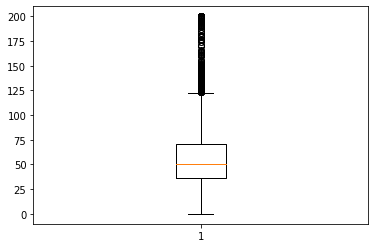

In [ ]:
#install module/package
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(data9["flood_depth"].astype("int64"))
plt.show()

In [ ]:
#Mean kedalaman banjir
mean_depth = data9[data9['Provinsi'] == 'Daerah Khusus Ibukota Jakarta']
mean_depth["flood_depth"] = mean_depth["flood_depth"].astype("int64")
mean = mean_depth["flood_depth"].mean()
mean

56.94290865384615

In [ ]:
depth_jkt=banjir_jkt
depth_jkt["flood_depth_number"] = depth_jkt["flood_depth"]
depth_jkt= depth_jkt.groupby(["disaster_type","flood_depth"]).agg({"flood_depth_number":"count"}).reset_index()
depth_jkt.sort_values(['flood_depth_number'], ascending = False).head(n=5)

#Dari hasil ini dapat dilihat bahwa kedalaman banjir tidak menentukan jumlah orang yg membuat tweet mengenai banjir

,disaster_type,flood_depth,flood_depth_number
111,flood,50,96
89,flood,30,68
100,flood,40,59
104,flood,44,58
122,flood,60,51


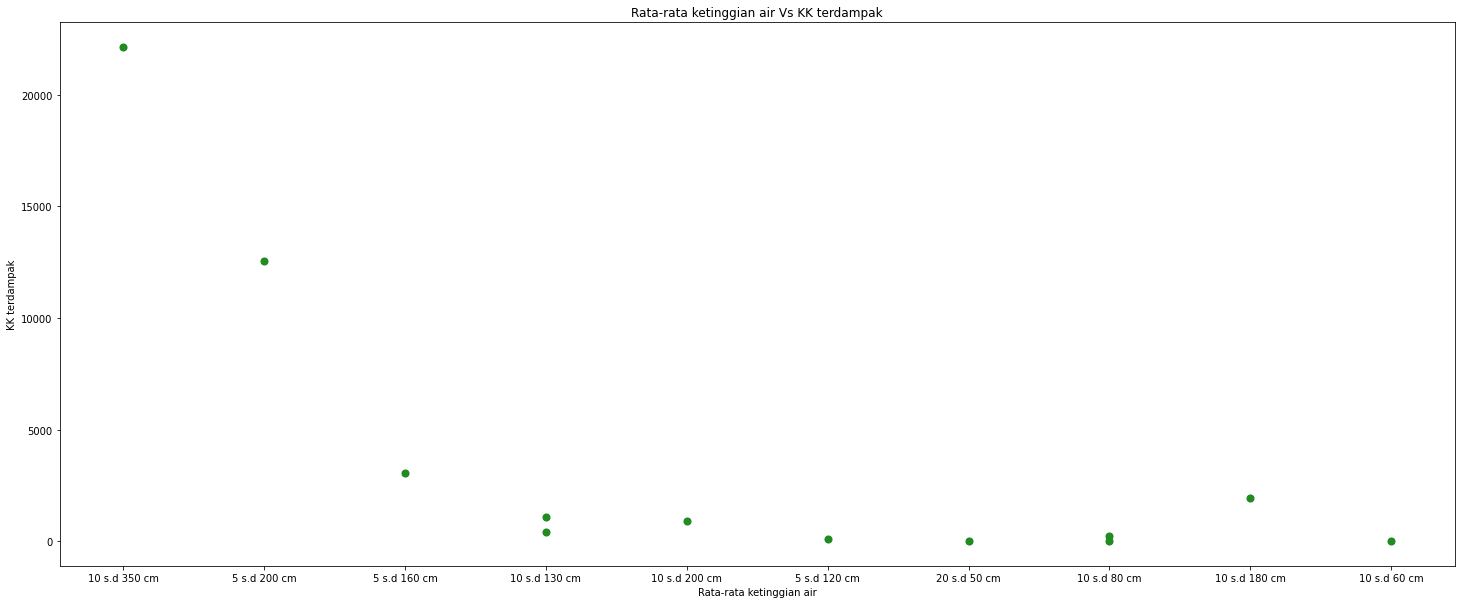

In [ ]:
#hubungan ketinggian banjir dengan korban
#membuat scatter plot
x_scat = 'rata_rata_ketinggian_air'       #ubah sesuai variabel yang diinginkan
y_scat = 'kk_terdampak'    #ubah sesuai variabel yang diinginkan

plt.scatter(df1[x_scat], df1[y_scat])
plt.title('Rata-rata ketinggian air Vs KK terdampak')  #sesuaikan judul scatter plot
plt.xlabel('Rata-rata ketinggian air')           #sesuaikan dengan nama sumbu x
plt.ylabel('KK terdampak')        #sesuaikan dengan nama sumbu y
plt.scatter(df1[x_scat],df1[y_scat],s=50,c='forestgreen')

plt.rcParams["figure.figsize"] = (10,25)
plt.show()

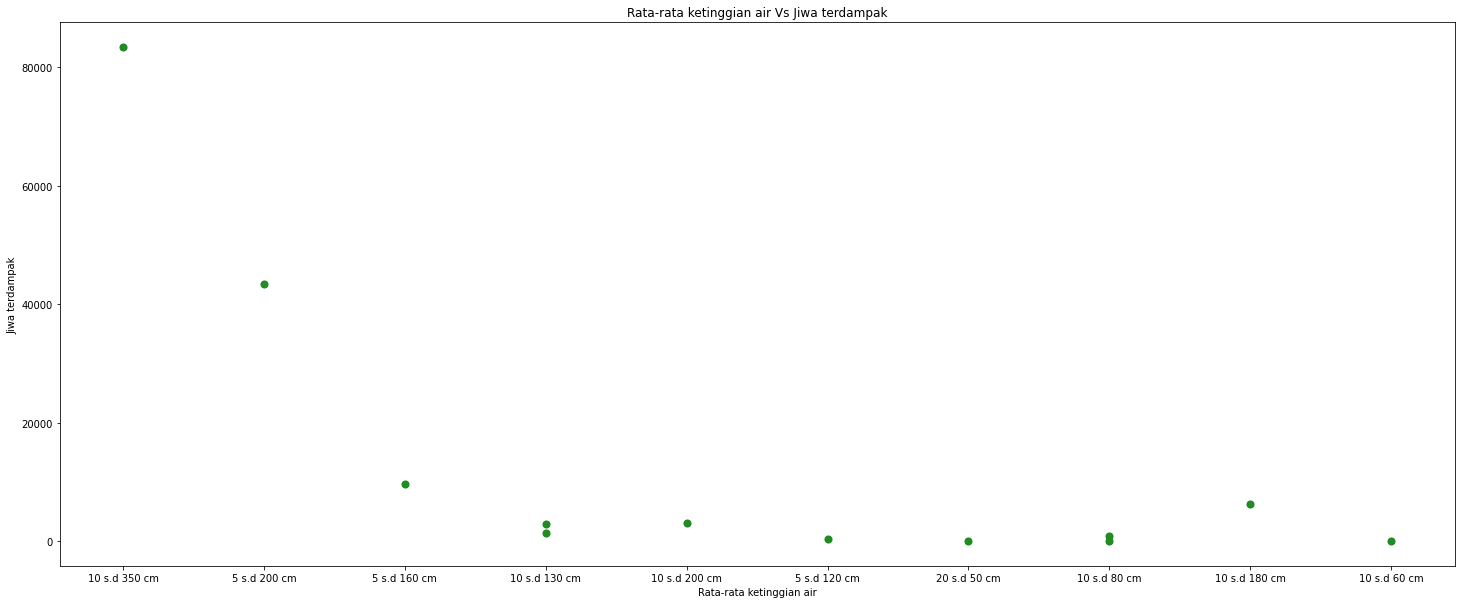

In [ ]:
#hubungan rata-rata ketinggian banjir dengan jiwa terdampak
#membuat scatter plot
x_scat = 'rata_rata_ketinggian_air'       #ubah sesuai variabel yang diinginkan
y_scat = 'jiwa_terdampak'    #ubah sesuai variabel yang diinginkan

plt.scatter(df1[x_scat], df1[y_scat])
plt.title('Rata-rata ketinggian air Vs Jiwa terdampak')  #sesuaikan judul scatter plot
plt.xlabel('Rata-rata ketinggian air')           #sesuaikan dengan nama sumbu x
plt.ylabel('Jiwa terdampak')        #sesuaikan dengan nama sumbu y
plt.scatter(df1[x_scat],df1[y_scat],s=50,c='forestgreen')

plt.rcParams["figure.figsize"] = (10,25)
plt.show()

In [ ]:
#5 Provinsi Paling banyak banjir di 2020
banjir2020= data10
banjir2020["year"] = banjir2020["year"].astype("str")
banjir2020 = banjir2020[banjir2020['year']== '2020']
banjir2020['cases_number'] = banjir2020['Provinsi']
banjir2020= banjir2020.groupby(["Provinsi","year"]).agg({"cases_number":"count"}).reset_index()
banjir2020.sort_values(['cases_number'], ascending=False).head()

,Provinsi,year,cases_number
5,Daerah Khusus Ibukota Jakarta,2020,1264
8,Jawa Barat,2020,417
2,Banten,2020,106
10,Jawa Timur,2020,71
9,Jawa Tengah,2020,66


In [ ]:
#5 Provinsi Paling banyak banjir di 2021
banjir2021= data10
banjir2021["year"] = banjir2021["year"].astype("str")
banjir2021 = banjir2021[banjir2021['year']== '2021']
banjir2021['cases_number'] = banjir2021['Provinsi']
banjir2021= banjir2021.groupby(["Provinsi","year"]).agg({"cases_number":"count"}).reset_index()
banjir2021.sort_values(['cases_number'], ascending = False)

,Provinsi,year,cases_number
5,Daerah Khusus Ibukota Jakarta,2021,400
8,Jawa Barat,2021,240
12,Kalimantan Selatan,2021,157
10,Jawa Timur,2021,110
9,Jawa Tengah,2021,93
2,Banten,2021,88
14,Kalimantan Timur,2021,57
1,Bali,2021,56
11,Kalimantan Barat,2021,34
26,Sulawesi Selatan,2021,30
